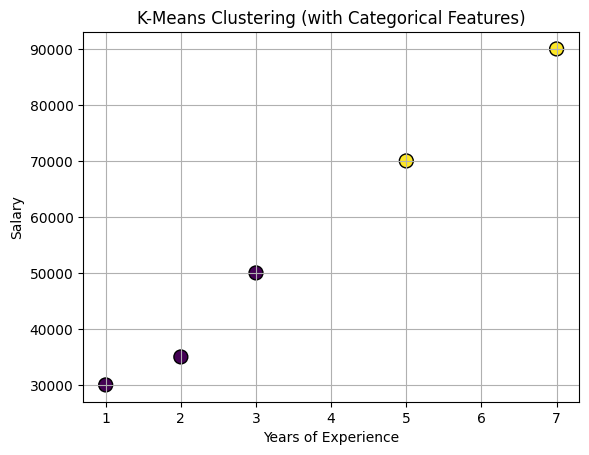


Clustered Data:
   education  years_experience   salary  cluster
0  Bachelors                 1  30000.0        0
1    Masters                 3  50000.0        0
2        PhD                 5  70000.0        1
3  Bachelors                 2  35000.0        0
4        PhD                 7  90000.0        1


In [1]:
#### Clustering with KMeans ###
# Sriram Parthasarathy
# LICENSES : MIT

'''
Clustering groups similar data points together without predefined labels (unsupervised learning).
When to use: Use for exploratory analysis, segmentation, or pattern detection.
Examples:

Customer segmentation for targeted marketing.

Grouping news articles by topic.

Identifying fraud patterns in transactions.
'''

# Clustering
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# ----------------------------
# STEP 1: Create sample dataset
# ----------------------------
data = {
    'education': ['Bachelors', 'Masters', 'PhD', 'Bachelors', 'PhD'],
    'years_experience': [1, 3, 5, 2, 7],
    'salary': [30000.0, 50000.0, 70000.0, 35000.0, 90000.0]
}
df = pd.DataFrame(data)

# ----------------------------
# STEP 2: Preprocess the data
# ----------------------------
# Define columns by type
categorical_cols = ['education']
numeric_cols = ['years_experience', 'salary']

# ColumnTransformer: OneHotEncode categoricals, Scale numericals
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
])

# ----------------------------
# STEP 3: Build & train KMeans
# ----------------------------
# Pipeline: Preprocess -> KMeans Clustering
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('kmeans', KMeans(n_clusters=2, random_state=42))
])

# Fit model and get cluster labels
df['cluster'] = pipeline.fit_predict(df)

# ----------------------------
# STEP 4: Visualize clusters
# ----------------------------
plt.scatter(df['years_experience'], df['salary'], c=df['cluster'], s=100, edgecolor='k')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('K-Means Clustering (with Categorical Features)')
plt.grid(True)
plt.show()

# Display final data
print("\nClustered Data:")
print(df)